# Poisson discrete count model for MTurk demographics

In [1]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.DataFrame.from_csv("mturk_surveys.csv",index_col=None)
df.gender[df.gender=='Female']='female'
df.head()

,Unnamed: 0,gender,hit_answered_date,hit_creation_date,household_income,household_size,location_city,location_country,location_region,marital_status,post_to_completion_secs,worker_id,year_of_birth
0,0,female,2016-09-14 17:37:11.297,2016-09-14 17:35:14.000,"$40,000-$59,999",1,mount holly,US,nj,divorced,117.0,a013d8ba79229f477b5b045bf35c7d57,1956
1,1,male,2016-09-14 17:29:09.539,2016-09-14 17:20:14.000,"Less than $10,000",2,pune,IN,mh,single,535.0,4958cd4059bd09a144c2698d50f5bc60,1992
2,2,female,2016-09-14 17:13:35.428,2016-09-14 16:20:14.000,"Less than $10,000",4,caracas,VE,a,divorced,3201.0,0a79a3e3ea28284e7a92ce0ddaa05e06,1978
3,3,female,2016-09-14 17:10:54.723,2016-09-14 17:05:13.000,"$75,000-$99,999",3,scottsdale,US,az,cohabitating,341.0,1079d94e2374ade52af1de09232c9797,1963
4,4,male,2016-09-14 16:52:20.792,2016-09-14 16:50:13.000,"Less than $10,000",4,ambala,IN,hr,single,127.0,897b71b78803b47bc19d0d31ff91856e,1993


In [2]:
# By grouping by the informations, count the number of times each user working on the MTurk

df1 = df.groupby(['worker_id','gender','household_income','marital_status','household_size',
                  'location_country','year_of_birth']).size().sort_values()
df1=df1.reset_index()
df1.columns= ['worker_id','gender','household_income','marital_status','household_size',
              'location_country','year_of_birth','number_of_times']
df1.head()

,worker_id,gender,household_income,marital_status,household_size,location_country,year_of_birth,number_of_times
0,0000ceeb6c91d4a1a53fec0de0cc3460,female,"$25,000-$39,999",single,1,US,1987,1
1,a14593ac153cc79be3b39dd5d7c92b10,male,"Less than $10,000",married,3,IN,1987,1
2,a14301a628ff22093311bd67a3b4377e,male,"$40,000-$59,999",married,2,DE,1982,1
3,a14301a628ff22093311bd67a3b4377e,male,"$40,000-$59,999",cohabitating,2,DE,1981,1
4,a14301a628ff22093311bd67a3b4377e,male,"$100,000 or more",married,3,DE,1980,1


In [3]:
# Group the country information into three categories - "US", "IN", "Other"
df1.location_country[(df1.location_country!='US')&(df1.location_country!='IN')]='Other'
# Group the marital information into two categories - "married", "single"
df1.marital_status[df1.marital_status!='married']='single'

0       US
1       IN
2    Other
3    Other
4    Other
Name: location_country, dtype: object

In [5]:
# Through preprocessing, encode the categorical strings into categorical number 
# Additionally, get the 'year_of_birth' in decade version

g = pd.get_dummies(df1.gender)
hi = pd.get_dummies(df1.household_income)
ms = pd.get_dummies(df1.marital_status)
hs = pd.get_dummies(df1.household_size)
lc = pd.get_dummies(df1.location_country)
yb = df1.year_of_birth//10*10

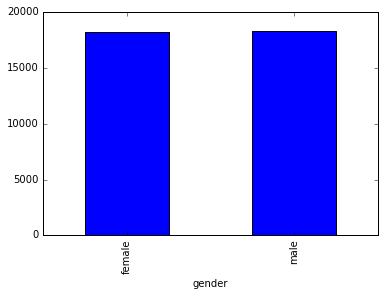

In [6]:
df.groupby(df1.gender).size().plot(kind='bar')

In [47]:
from statsmodels.discrete.discrete_model import Poisson
ps_gender = Poisson(df1.number_of_times,g).fit()
ps_gender.summary()

Optimization terminated successfully.
         Current function value: 1.423447
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:        number_of_times   No. Observations:                36497
Model:                        Poisson   Df Residuals:                    36495
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Oct 2016   Pseudo R-squ.:               0.0001055
Time:                        14:07:02   Log-Likelihood:                -51952.
converged:                       True   LL-Null:                       -51957.
                                        LLR p-value:                 0.0009289
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
female         0.3778      0.006     61.570      0.000         0.366     0.390
male           0.3489      0.006     56.190      0.000         0.337     0.361
==============================================================================
"""

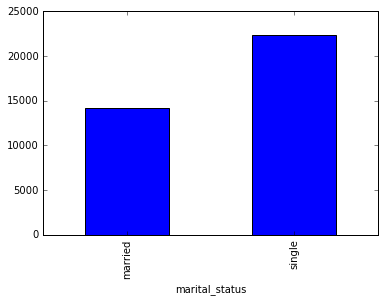

In [11]:
df.groupby(df1.marital_status).size().plot(kind='bar')

In [32]:
from statsmodels.discrete.discrete_model import Poisson
ps_gender = Poisson(df1.number_of_times,ms).fit()
ps_gender.summary()

Optimization terminated successfully.
         Current function value: 1.421740
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:        number_of_times   No. Observations:                36497
Model:                        Poisson   Df Residuals:                    36495
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Oct 2016   Pseudo R-squ.:                0.001305
Time:                        12:58:23   Log-Likelihood:                -51889.
converged:                       True   LL-Null:                       -51957.
                                        LLR p-value:                 2.487e-31
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
married        0.4256      0.007     62.601      0.000         0.412     0.439
single         0.3220      0.006     56.570      0.000         0.311     0.333
==============================================================================
"""

In [37]:
from statsmodels.discrete.discrete_model import Poisson
ps_gender = Poisson(df1.number_of_times,pd.concat([ms,g],axis=1)).fit()
ps_gender.summary()

Optimization terminated successfully.
         Current function value: 1.421687
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:        number_of_times   No. Observations:                36497
Model:                        Poisson   Df Residuals:                    36494
Method:                           MLE   Df Model:                            2
Date:                Sat, 22 Oct 2016   Pseudo R-squ.:                0.001342
Time:                        12:59:45   Log-Likelihood:                -51887.
converged:                       True   LL-Null:                       -51957.
                                        LLR p-value:                 5.149e-31
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
married        0.2375   1.45e+05   1.63e-06      1.000     -2.85e+05  2.85e+05
single         0.1360   1.45e+05   9.36e-07      1.000     -2.85e+05  2.85e+05
female         0.1955   1.45e+05   1.34e-06      1.000     -2.85e+05  2.85e+05
male           0.1781   1.45e+05   1.22e-06      1.000     -2.85e+05  2.85e+05
==============================================================================
"""

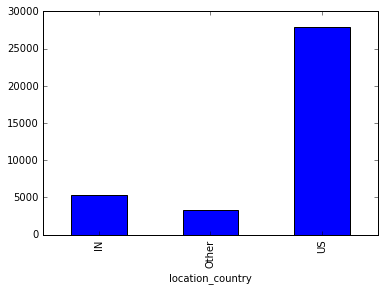

In [13]:
df.groupby(df1.location_country).size().plot(kind='bar')

In [14]:
from statsmodels.discrete.discrete_model import Poisson
ps_gender = Poisson(df1.number_of_times,lc).fit()
ps_gender.summary()

Optimization terminated successfully.
         Current function value: 1.421607
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:        number_of_times   No. Observations:                36497
Model:                        Poisson   Df Residuals:                    36494
Method:                           MLE   Df Model:                            2
Date:                Sat, 22 Oct 2016   Pseudo R-squ.:                0.001398
Time:                        12:51:30   Log-Likelihood:                -51884.
converged:                       True   LL-Null:                       -51957.
                                        LLR p-value:                 2.803e-32
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
IN             0.4271      0.011     38.594      0.000         0.405     0.449
Other          0.2012      0.016     12.760      0.000         0.170     0.232
US             0.3685      0.005     73.985      0.000         0.359     0.378
==============================================================================
"""

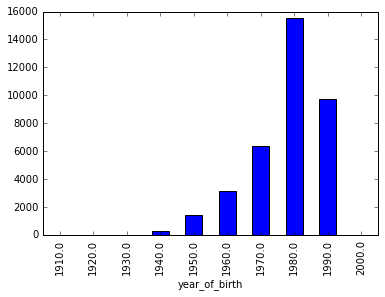

In [15]:
df.groupby(yb).size().plot(kind='bar')

In [16]:
from statsmodels.discrete.discrete_model import Poisson
ps_gender = Poisson(df1.number_of_times,yb).fit()
ps_gender.summary()

Optimization terminated successfully.
         Current function value: 1.423867
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:        number_of_times   No. Observations:                36497
Model:                        Poisson   Df Residuals:                    36496
Method:                           MLE   Df Model:                            0
Date:                Sat, 22 Oct 2016   Pseudo R-squ.:              -0.0001895
Time:                        12:51:35   Log-Likelihood:                -51967.
converged:                       True   LL-Null:                       -51957.
                                        LLR p-value:                       nan
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
year_of_birth     0.0002   2.21e-06     83.126      0.000         0.000     0.000
=================================================================================
"""

In [50]:
# Running Poisson regression based on all categorical data
from statsmodels.discrete.discrete_model import Poisson
ps_gender = Poisson(df1.number_of_times,pd.concat([hs,hi,g],axis=1)).fit(maxiter=200)
ps_gender.summary()

         Current function value: 1.422528
         Iterations: 200


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:        number_of_times   No. Observations:                36497
Model:                        Poisson   Df Residuals:                    36484
Method:                           MLE   Df Model:                           12
Date:                Sat, 22 Oct 2016   Pseudo R-squ.:               0.0007512
Time:                        14:09:25   Log-Likelihood:                -51918.
converged:                      False   LL-Null:                       -51957.
                                        LLR p-value:                 9.666e-12
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
1                     0.1069   5.03e+05   2.13e-07      1.000     -9.86e+05  9.86e+05
2                     0.0702   5.18e+05   1.35e-07      1.000     -1.02e+06  1.02e+06
3                     0.0914   5.04e+05   1.81e-07      1.000     -9.87e+05  9.87e+05
4                     0.0727   5.03e+05   1.45e-07      1.000     -9.86e+05  9.86e+05
5+                    0.0956   5.07e+05   1.89e-07      1.000     -9.93e+05  9.93e+05
$10,000-$14,999      -0.0141   4.52e+05  -3.13e-08      1.000     -8.87e+05  8.87e+05
$100,000 or more      0.0689    4.5e+05   1.53e-07      1.000     -8.83e+05  8.83e+05
$15,000-$24,999       0.0305   4.62e+05   6.61e-08      1.000     -9.05e+05  9.05e+05
$25,000-$39,999       0.0592   4.58e+05   1.29e-07      1.000     -8.99e+05  8.99e+05
$40,000-$59,999       0.0757   4.55e+05   1.66e-07      1.000     -8.91e+05  8.91e+05
$60,000-$74,999       0.0459   4.58e+05      1e-07      1.000     -8.99e+05  8.99e+05
$75,000-$99,999       0.0542   4.54e+05   1.19e-07      1.000     -8.89e+05  8.89e+05
Less than $10,000     0.1168   4.52e+05   2.58e-07      1.000     -8.87e+05  8.87e+05
female                0.2347   2.45e+05   9.57e-07      1.000      -4.8e+05   4.8e+05
male                  0.2031   2.45e+05   8.28e-07      1.000      -4.8e+05   4.8e+05
=====================================================================================
"""

As there are too many independent variables, the regression can't converges, we try to narrow down the country and marital status into a more general group

In [65]:
# Running Poisson regression based on all categorical data

from statsmodels.discrete.discrete_model import Poisson
ps_gender = Poisson(df1.number_of_times,pd.concat([hs,hi,g,ms,yb,lc],axis=1)).fit(maxiter=40)
ps_gender.summary()

         Current function value: 1.414553
         Iterations: 40


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:        number_of_times   No. Observations:                36497
Model:                        Poisson   Df Residuals:                    36480
Method:                           MLE   Df Model:                           16
Date:                Sat, 22 Oct 2016   Pseudo R-squ.:                0.006353
Time:                        14:16:19   Log-Likelihood:                -51627.
converged:                      False   LL-Null:                       -51957.
                                        LLR p-value:                3.774e-130
=====================================================================================
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
1                    12.2271   2.08e+05   5.88e-05      1.000     -4.08e+05  4.08e+05
2                    12.1704   2.05e+05   5.94e-05      1.000     -4.02e+05  4.02e+05
3                    12.1919   1.96e+05   6.23e-05      1.000     -3.84e+05  3.84e+05
4                    12.1696   1.91e+05   6.39e-05      1.000     -3.73e+05  3.73e+05
5+                   12.1904   2.16e+05   5.63e-05      1.000     -4.24e+05  4.24e+05
$10,000-$14,999       8.0604   3.77e+05   2.14e-05      1.000      -7.4e+05   7.4e+05
$100,000 or more      8.1330   3.77e+05   2.16e-05      1.000     -7.39e+05  7.39e+05
$15,000-$24,999       8.1114   3.77e+05   2.15e-05      1.000      -7.4e+05   7.4e+05
$25,000-$39,999       8.1402   3.76e+05   2.16e-05      1.000     -7.37e+05  7.37e+05
$40,000-$59,999       8.1514   3.77e+05   2.16e-05      1.000     -7.39e+05  7.39e+05
$60,000-$74,999       8.1141   3.76e+05   2.16e-05      1.000     -7.37e+05  7.37e+05
$75,000-$99,999       8.1153   3.78e+05   2.15e-05      1.000     -7.41e+05  7.41e+05
Less than $10,000     8.1948   3.76e+05   2.18e-05      1.000     -7.37e+05  7.37e+05
female               32.8308    4.2e+05   7.82e-05      1.000     -8.23e+05  8.23e+05
male                 32.8312   4.22e+05   7.78e-05      1.000     -8.27e+05  8.27e+05
married             -41.5027    2.8e+05     -0.000      1.000     -5.49e+05  5.49e+05
single              -41.5566    2.8e+05     -0.000      1.000     -5.49e+05  5.49e+05
year_of_birth        -0.0072      0.000    -17.634      0.000        -0.008    -0.006
IN                    3.0114        nan        nan        nan           nan       nan
Other                 2.8034        nan        nan        nan           nan       nan
US                    2.9539        nan        nan        nan           nan       nan
=====================================================================================
"""

As the regression still can't converges, we try again to narrow down the features.